## Flight Price Prediction Project

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

## Steps

## 1. Data Collection
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, 
More the data better the model
In this section you have to scrape the data of flights from different websites (yatra.com, 
skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have 
limit, it’s up to you and your creativity. Generally, these columns areairline name, date of journey, 
source, destination, route, departure time, arrival time, duration, total stops and the target variable 
price. You can make changes to it, you can add or you can remove some columns, it completely
depends on the website from which you are fetching the data.

## 2. Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?

## 3. Model Building
After collecting the data, you need to build a machine learning model. Before model building do 
all data pre-processing steps. Try different models with different hyper parameters and select 
the bestmodel.

### Follow the complete life cycle of data science. Include all the steps like
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best mode

## Importing all the necessary libraries

In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## The Data

#### Let us import the data which we have scraped and stored in csv file, we will convert into Dataframe format as per convenience.

In [3]:
df = pd.read_csv('flight_datas.csv')
df

,Unnamed: 0,Airline Name,Departure Date,Arrival Time,Departure Time,Source,Destination,Duration,Total Stops,Price
0,0,Air India,9 June 2022,19:10,15:25,Mumbai,New Delhi,3h 45m,1 Stop,"7,308"
1,1,Go First,9 June 2022,20:05,18:00,Mumbai,New Delhi,2h 05m,Non Stop,"8,042"
2,2,Go First,9 June 2022,02:20,00:10,Mumbai,New Delhi,2h 10m,Non Stop,"8,042"
3,3,Go First,9 June 2022,11:35,09:25,Mumbai,New Delhi,2h 10m,Non Stop,"8,042"
4,4,Go First,9 June 2022,13:10,11:00,Mumbai,New Delhi,2h 10m,Non Stop,"8,042"
...,...,...,...,...,...,...,...,...,...,...
2485,2485,Air India,10 June 2022,13:25\n+ 1 day,09:15,Patna,Lucknow,28h 10m,3 Stop(s),"17,963"
2486,2486,Air India,10 June 2022,13:20\n+ 1 day,19:10,Patna,Lucknow,18h 10m,2 Stop(s),"22,842"
2487,2487,Air India,10 June 2022,13:20\n+ 1 day,19:10,Patna,Lucknow,18h 10m,2 Stop(s),"22,842"
2488,2488,Air India,10 June 2022,13:20\n+ 1 day,16:00,Patna,Lucknow,21h 20m,2 Stop(s),"23,577"


In [4]:
#Let us check the datatypes inwhich all the attributes are available for both test and train sets

df.dtypes

Unnamed: 0         int64
Airline Name      object
Departure Date    object
Arrival Time      object
Departure Time    object
Source            object
Destination       object
Duration          object
Total Stops       object
Price             object
dtype: object

## Exploratory Data Analysis

#### We can see all the attributes in data set are in categorical format which is not suitable for building our models, hence we need to convert all these into numerical format.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2490 non-null   int64 
 1   Airline Name    2490 non-null   object
 2   Departure Date  2490 non-null   object
 3   Arrival Time    2490 non-null   object
 4   Departure Time  2490 non-null   object
 5   Source          2490 non-null   object
 6   Destination     2490 non-null   object
 7   Duration        2490 non-null   object
 8   Total Stops     2490 non-null   object
 9   Price           2490 non-null   object
dtypes: int64(1), object(9)
memory usage: 194.7+ KB


In [6]:
#checking the names of all the attributes in the data sets

print(' Column names:\n',df.columns)

 Column names:
 Index(['Unnamed: 0', 'Airline Name', 'Departure Date', 'Arrival Time',
       'Departure Time', 'Source', 'Destination', 'Duration', 'Total Stops',
       'Price'],
      dtype='object')


##### Let us check the null values for the datasets, and treat them.

In [7]:
df.isnull().sum()

Unnamed: 0        0
Airline Name      0
Departure Date    0
Arrival Time      0
Departure Time    0
Source            0
Destination       0
Duration          0
Total Stops       0
Price             0
dtype: int64

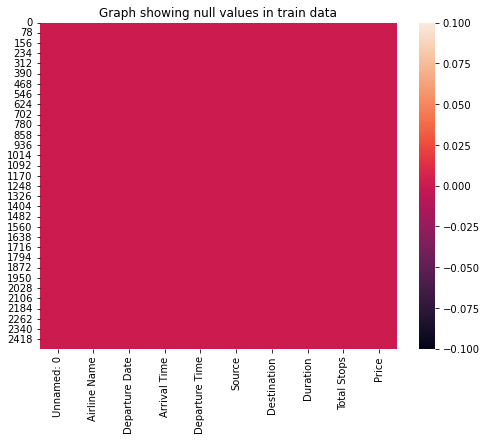

In [8]:
#visualizing the null values after the removal for both train and test data

plt.figure(figsize=(8,6),facecolor='white')
sns.heatmap(df.isnull())
plt.title('Graph showing null values in train data')
plt.show()

In [9]:
#let us check the unique values present in the dataset

for i in df:
    print('Name of the attribute: ',i,'\n',df[i].value_counts())

Name of the attribute:  Unnamed: 0 
 0       1
1662    1
1655    1
1656    1
1657    1
       ..
831     1
832     1
833     1
834     1
2489    1
Name: Unnamed: 0, Length: 2490, dtype: int64
Name of the attribute:  Airline Name 
 Vistara         751
IndiGo          640
Air India       499
Go First        261
Air Asia        176
SpiceJet        162
Alliance Air      1
Name: Airline Name, dtype: int64
Name of the attribute:  Departure Date 
 9 June 2022     2226
10 June 2022     264
Name: Departure Date, dtype: int64
Name of the attribute:  Arrival Time 
 08:55\n+ 1 day    51
00:05\n+ 1 day    35
21:35             34
21:15             30
13:10             30
                  ..
02:00              1
11:20              1
09:20\n+ 1 day     1
23:20\n+ 1 day     1
05:30              1
Name: Arrival Time, Length: 301, dtype: int64
Name of the attribute:  Departure Time 
 07:00    73
06:00    56
21:30    52
06:10    44
16:00    43
         ..
14:45     1
09:20     1
07:40     1
05:30     1
1

## Observations
1. There are no null values in the dataset.
2. We need to extract important information from the Arrival time, departure time, so that we can have clear picture of the dataset.
3. There are some values which depicts the same meaning for the records in dataset, we need to treat  those attributes.

    {Like Source has input values 'Bangalore' and 'Banglore' which means the same}

## Univariate Analysis

#### Let us visualize the distribution, relationship and information of all the attributes using various graph methods.

Vistara         751
IndiGo          640
Air India       499
Go First        261
Air Asia        176
SpiceJet        162
Alliance Air      1
Name: Airline Name, dtype: int64


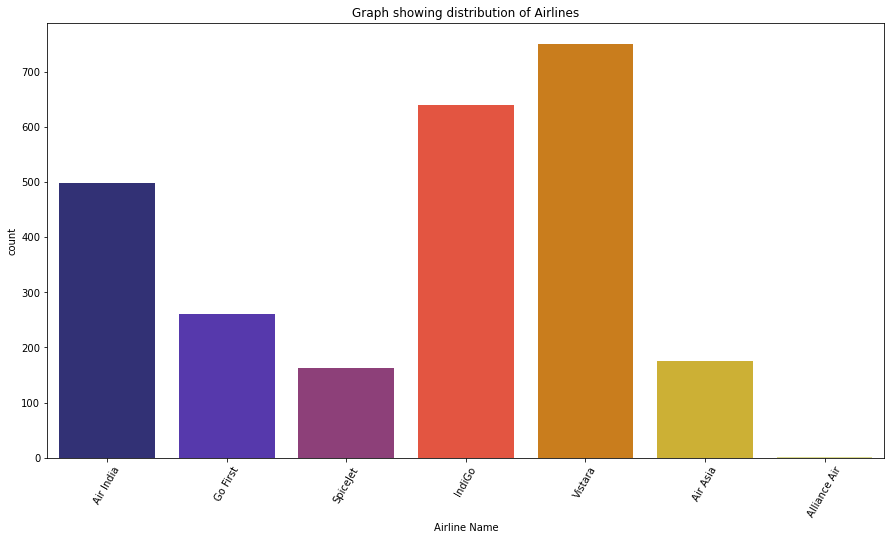

In [10]:
#using bar graph
print(df['Airline Name'].value_counts())

plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(df['Airline Name'],palette='CMRmap')
plt.title('Graph showing distribution of Airlines')
plt.xticks(rotation=60)
plt.show()

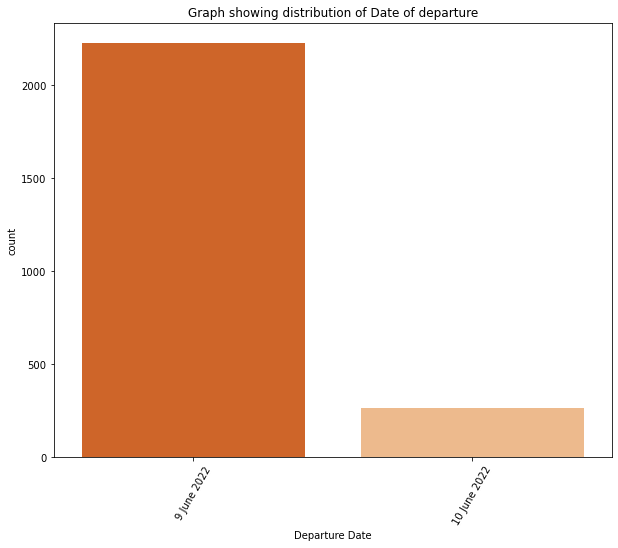

In [11]:
#using bar graph

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Departure Date'],palette='Oranges_r')
plt.title('Graph showing distribution of Date of departure')
plt.xticks(rotation=60)
plt.show()

Mumbai       1501
Bangalore     457
Kolkata       151
Chennai       117
Hyderabad      98
Ahmedabad      89
Kochi          54
Patna          23
Name: Source, dtype: int64


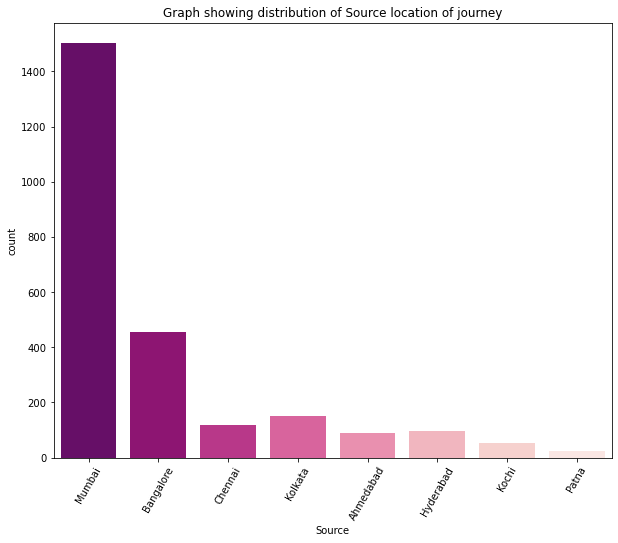

In [12]:
#using bar graph
print(df['Source'].value_counts())
plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Source'],palette='RdPu_r')
plt.title('Graph showing distribution of Source location of journey')
plt.xticks(rotation=60)
plt.show()

New Delhi    1203
Mumbai        546
Bangalore     449
Chennai       152
Kochi         117
Lucknow        23
Name: Destination, dtype: int64


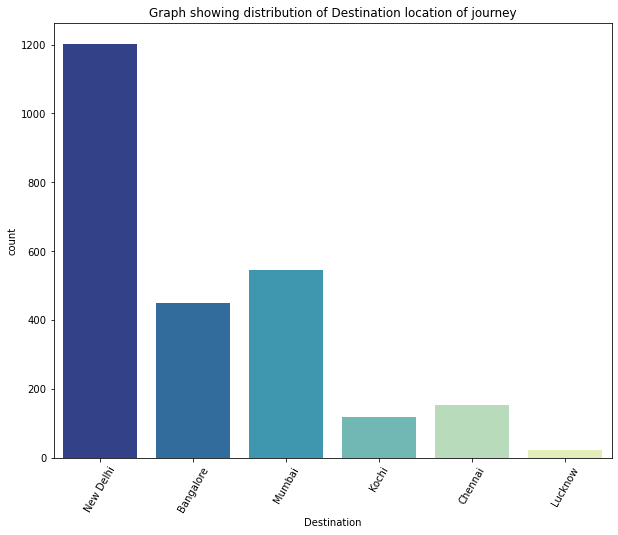

In [13]:
#using bar graph
print(df['Destination'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Destination'],palette='YlGnBu_r')
plt.title('Graph showing distribution of Destination location of journey')
plt.xticks(rotation=60)
plt.show()

### Changing the datatype of Price from categorical to Numerical

In [14]:
for i in range(len(df)):
    df['Price'][i]=df['Price'][i].replace(',','')

df['Price'] = df['Price'].astype(int)

In [15]:
#Replacing names of cities mentioned different ways in Source and Destination into same format.
df['Source'].replace({'New Delhi':'Delhi','Banglore':'Bangalore'},inplace=True)

df['Destination'].replace({'New Delhi':'Delhi','Banglore':'Bangalore'},inplace=True)


#converting airlines with less numbers as others 
df['Airline Name'].replace(to_replace=['Go First','GoAir','Multiple carriers Premium economy','Jet Airways Business','Trujet','Vistara Premium economy'],value='Others', inplace=True)


In [16]:
#cleaning the 'Total Stops' attribute
df['Total Stops'].replace(to_replace=['1 stop','1 Stop'],value=1,inplace=True)
df['Total Stops'].replace(to_replace=['non-stop','Non Stop'],value=0,inplace=True)
df['Total Stops'].replace(to_replace=['3 stops','3 Stop(s)'],value=3,inplace=True)
df['Total Stops'].replace(to_replace=['2 stops','2 Stop(s)'],value=2,inplace=True)
    
df['Total Stops'].value_counts()

1    1652
0     574
2     256
3       8
Name: Total Stops, dtype: int64

1    1652
0     574
2     256
3       8
Name: Total Stops, dtype: int64


NameError: name 'ax' is not defined

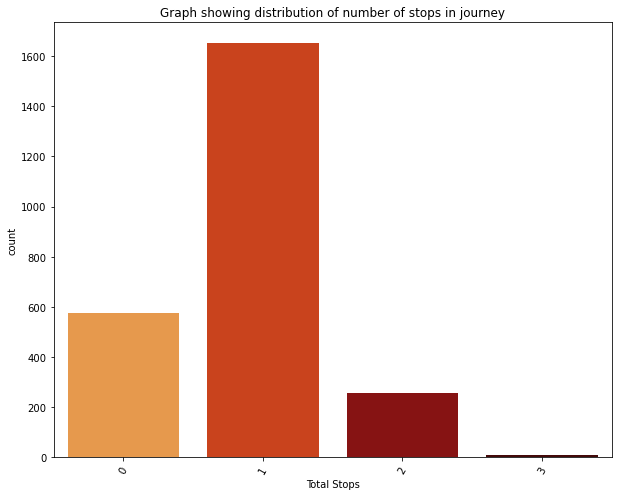

In [17]:
#using bar graph
print(df['Total Stops'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(df['Total Stops'],palette='gist_heat_r')
plt.title('Graph showing distribution of number of stops in journey')
plt.xticks(rotation=60)

#labels on bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
plt.show()

## Observations:
1. Indigo flights and Jet Airways constitutes nearly 50% of total flights compared to other flights used. They hospitality of the flight, pricing ranges may be considered for this high number of usage.
2. The number of flights are distributed normally except Weekends or holidays over the period. 
3. Nearly 50 % of total flight travel is observed from New Delhi and Kolkata.
4. 30% of the flights travelling have Cochin as destination.
5. 75% of the flights travelling are not having any stops or have only 1 stop.

##############################################

1. We have to convert the price into numerical format.
2. As Jet Airways Business, Go Air, Go First, Vistara Premium Economy, Multiple carriers Premium economy, Trujet has very less flights we need to take care of this data
3. Soures have same locations but mentioned in different ways, we can correct the format.
4. Destination have same locations but mentioned in different ways, we can correct the format.
5. Total number of stops have the information but mentioned in different ways we need to change the format.


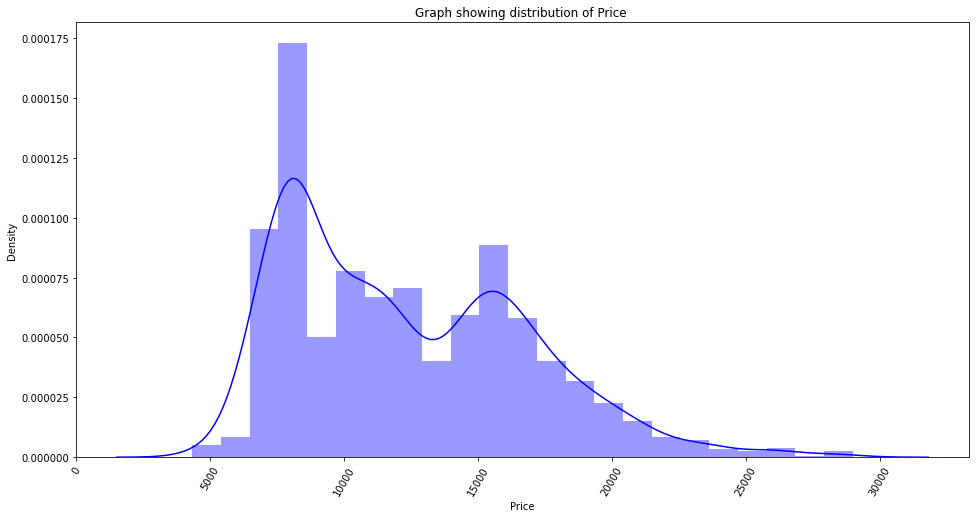

In [18]:
plt.figure(figsize=(16,8), facecolor='white')
sns.distplot(df['Price'], color='blue')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Price ")
plt.show()

#### The price range was varied in between 1000 to 15000 on average,Some luxury Business class flights are having upto 50000 cost are also seen.

## Bi-variate Analysis

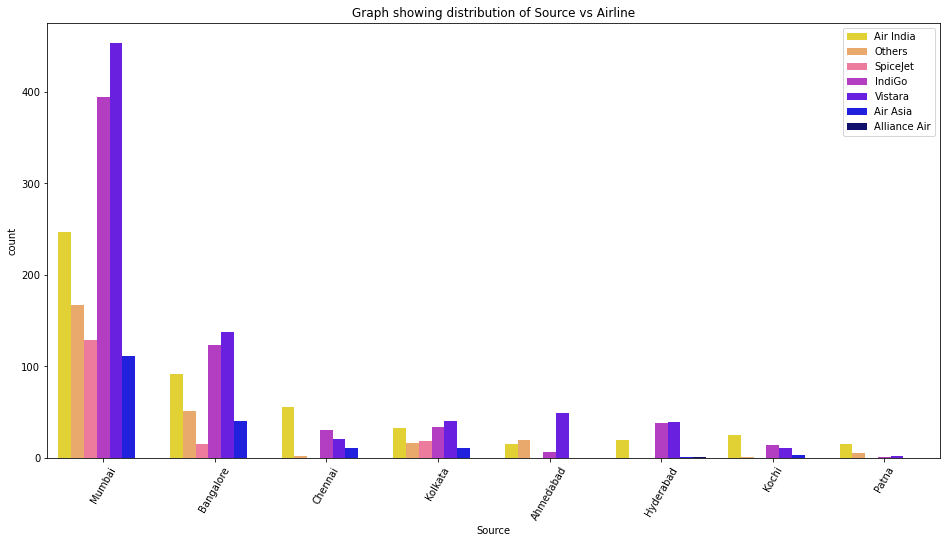

In [19]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Source', hue='Airline Name', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Source vs Airline")
plt.legend(loc = 'upper right')
plt.show()

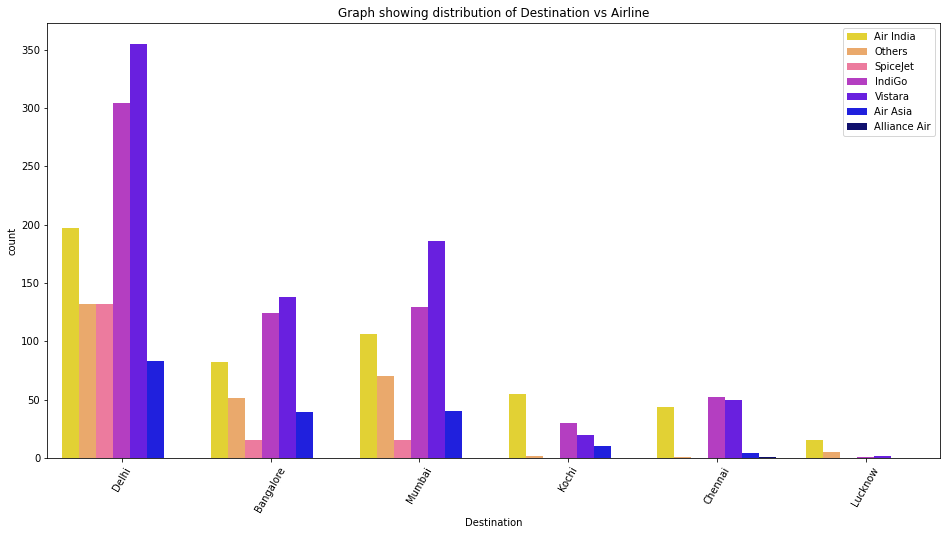

In [20]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Destination', hue='Airline Name', data=df,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Destination vs Airline")
plt.legend(loc = 'upper right')
plt.show()

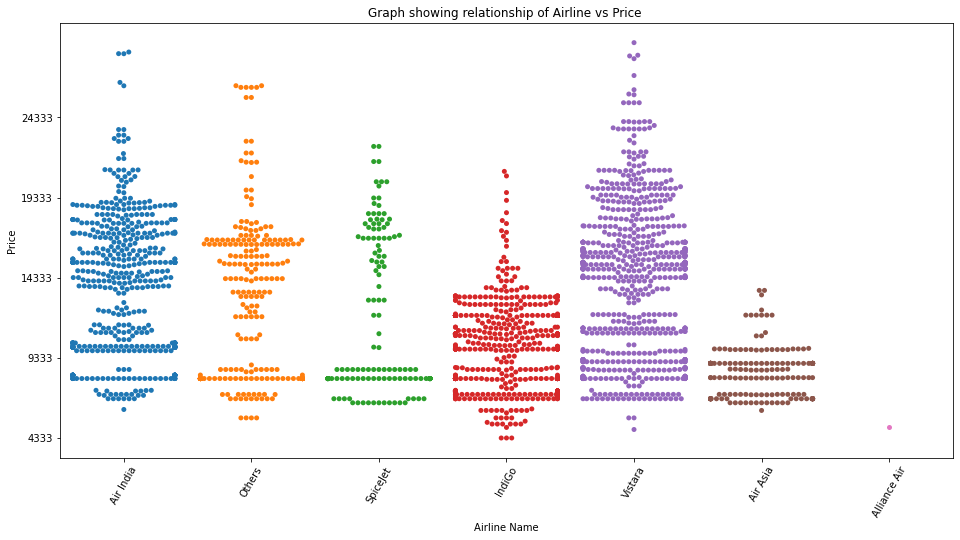

In [21]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price', x='Airline Name', data=df)
plt.title("Graph showing relationship of Airline vs Price ")
plt.xticks(rotation=60)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

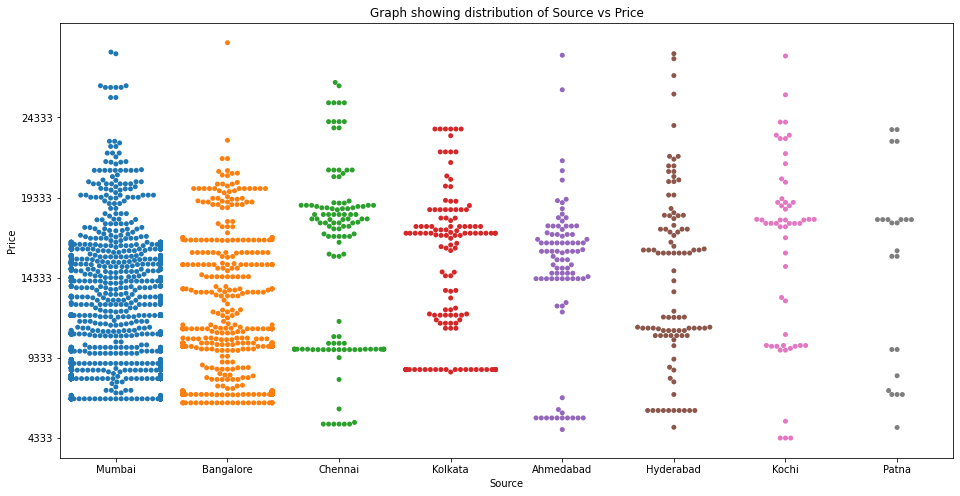

In [22]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Source', y='Price',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations
1. We see Jet airways and Indigo are the highest used airline
2. There are few flights going from Hyderabad and Kochi.
3. The average price of flights have average price of 7500-10000.
4. Flights moving from Bangalore have the highest price ranges.

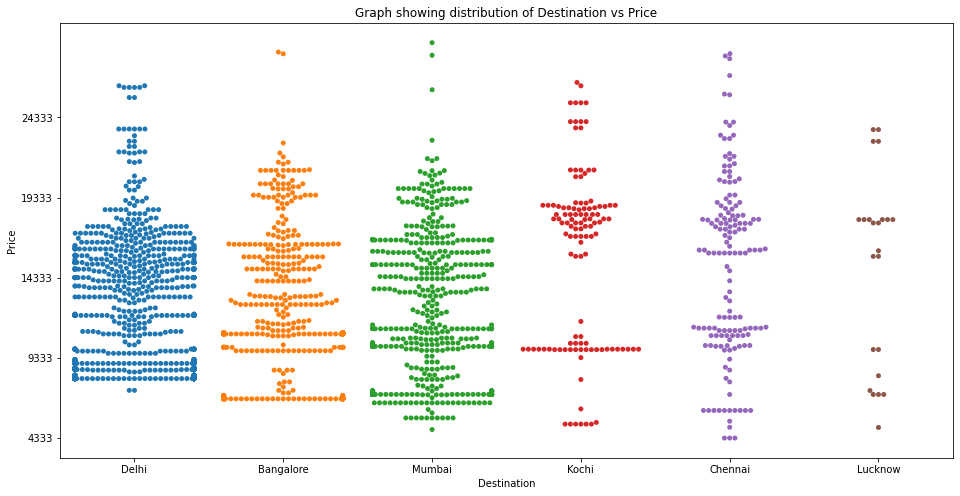

In [23]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(x='Destination', y='Price',data=df) 
plt.title("Graph showing distribution of Destination vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

1    1652
0     574
2     256
3       8
Name: Total Stops, dtype: int64


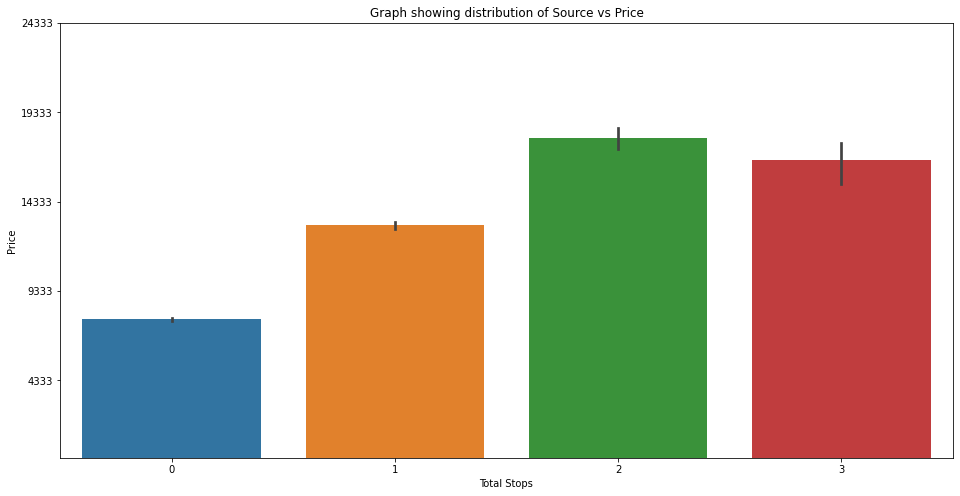

In [24]:
print(df['Total Stops'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.barplot(y='Price',x='Total Stops',data=df) 
plt.title("Graph showing distribution of Source vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations:

1. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? Does price increase as we get near to departure date?
>   We can see there are peaks formed in all the 4 months of observations marked in different colours, 
    All the spikes seen are due to weekends(saturdays n sundays). 
    The increase in price of tickets is about 10% of the regular price range.
    We can expect the price is gradually higher then regular days.

2. What is the best time to buy so that the consumer can save the most by taking the least risk?
> As per the observations, No matter of date of booking, we can expect pricings are to be higher during the weekends, 
one month prior of the expected date of journey can reduce the price of tickets during weekdays.

4. Is Indigo cheaper than Jet Airways?
> The price ranging of Indigo is in around the mean of 8500- 10000, Jetairways is having  price range which is higher than indigo which is around 10000-15000 range, Where as we can see the highest price range in Business class flights.  

## Data Preprocessing

1. We can extract hours and minutes from the arrival time and departure time.
2. Based on the hours we can split the data into early morning flights, morning flights or evening/Night flights.
3. Total Stops can be replaced with non-stop = 0, 1-stop=1, 2-stop=2, 3-stop=3, 4-stop=4 etc
4. Source and Destinations are to be encoded.

In [25]:
for i in range(len(df['Arrival Time'])):
    df['Arrival Time'][i]=df['Arrival Time'][i].replace('+ 1 day','').split('\n')[0]
    df['Arrival Time'][i]=df['Arrival Time'][i].split(' ')[0]

In [26]:
#extracting Hour of Arrival and minute of departure from departure attribute 
df['Hour_Arr']  = pd.to_datetime(df['Arrival Time']).dt.hour
df['Minute_Arr']  = pd.to_datetime(df['Arrival Time']).dt.minute

#dropping the arrival_time from the dataset permanently
df.drop(columns='Arrival Time', inplace=True)


In [27]:
for i in range(0,24):
    if i<=6:
        df['Hour_Arr'].replace(i,'Early Morning',inplace=True)
        
    elif i>6 and i <=12:
        df['Hour_Arr'].replace(i,'Morning',inplace=True)
        
    elif i>12 and i<=18:
        df['Hour_Arr'].replace(i,'Afternoon',inplace=True)
        
    elif i>18 and i<=23:
        df['Hour_Arr'].replace(i,'Night',inplace=True)
    else:
        pass
        
df['Hour_Arr'].value_counts()

Night            928
Morning          648
Afternoon        630
Early Morning    284
Name: Hour_Arr, dtype: int64

In [28]:
#extracting Hour of departure and minute of departure from departure attribute 
df['Hour_Dep']  = pd.to_datetime(df['Departure Time']).dt.hour
df['Minute_Dep']  = pd.to_datetime(df['Departure Time']).dt.minute

#dropping the dep_time from the dataset permanently
df.drop(columns='Departure Time', inplace=True)

In [29]:
for i in range(0,24):
    if i<=6:
        df['Hour_Dep'].replace(i,'Early Morning',inplace=True)
    elif i>6 and i <=12:
        df['Hour_Dep'].replace(i,'Morning',inplace=True)
    elif i>12 and i<=18:
        df['Hour_Dep'].replace(i,'Afternoon',inplace=True)
    elif i>18 and i<24:
        df['Hour_Dep'].replace(i,'Night',inplace=True)
    else:
        pass
        
df['Hour_Dep'].value_counts()

Morning          902
Afternoon        658
Night            514
Early Morning    416
Name: Hour_Dep, dtype: int64

In [30]:
#we have some values where hour value is missing, and minutes missing in some data, Let us make the data complete before extracting particular values.
 
lst = list(df['Duration'])
Dur_hr = []
Dur_sec=[]
for i in range(len(lst)):
    if(lst[i].split() == 2):
        pass
    else:
        if('h' in lst[i]):
            lst[i] = lst[i]+'0m'
        else:
            lst[i] = '0h'+lst[i]
    
for i in range(len(lst)):  
    Dur_hr.append(lst[i].split('h')[0])
    Dur_sec.append(lst[i].split('m')[0].split('h')[-1].replace(' ',''))
    
df['Dur_hr']=Dur_hr
df['Dur_sec']=Dur_sec

#converting Dur_hr, Dur_sec columns into numerical datatypes
df['Dur_hr'] = df['Dur_hr'].astype(int)
df['Dur_sec'] = df['Dur_sec'].astype(int)


df.drop(['Duration'], inplace=True,axis=1)

Night            928
Morning          648
Afternoon        630
Early Morning    284
Name: Hour_Arr, dtype: int64


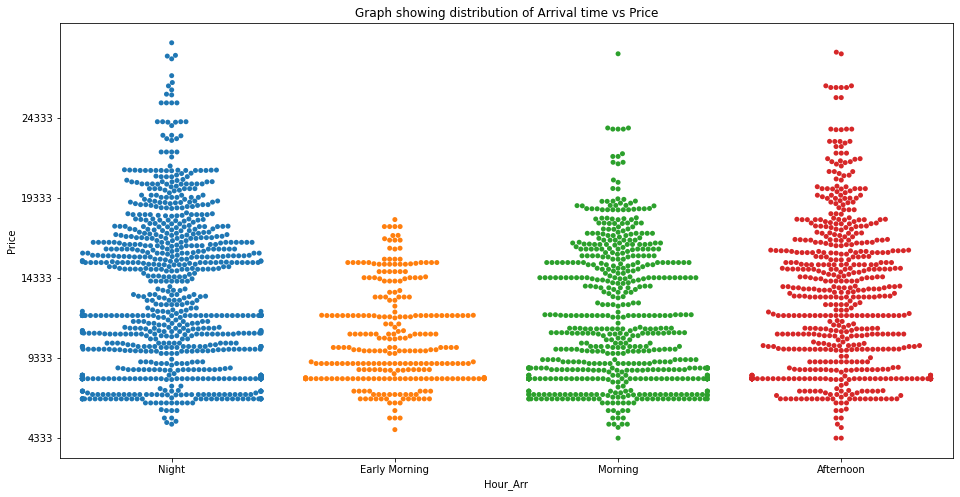

In [31]:
print(df['Hour_Arr'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price',x='Hour_Arr',data=df) 
plt.title("Graph showing distribution of Arrival time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

Morning          902
Afternoon        658
Night            514
Early Morning    416
Name: Hour_Dep, dtype: int64


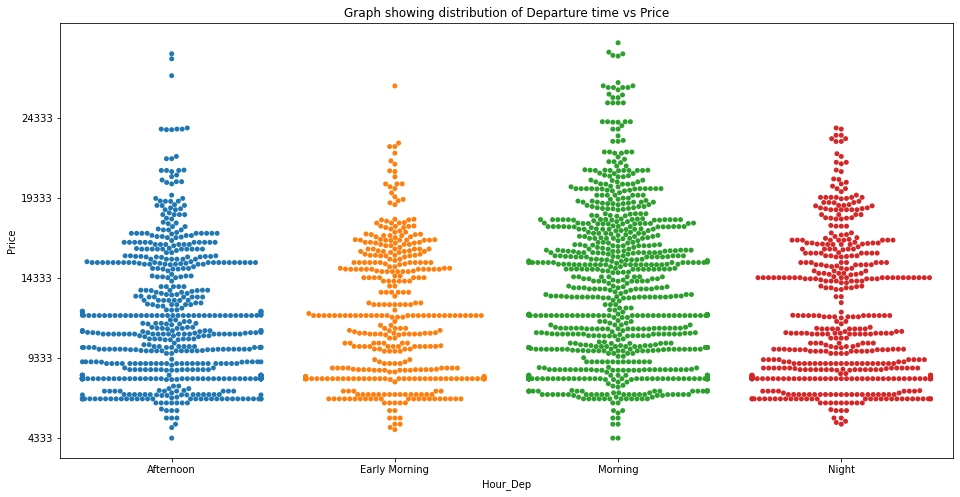

In [32]:
print(df['Hour_Dep'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='Price',x='Hour_Dep',data=df) 
plt.title("Graph showing distribution of Departure time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(df['Price']), max(df['Price']), 5000))
plt.show()

## Observations
1. Are morning flights expensive?
> We see that the early morning flights from 0 to 6 AM have the price ranges below 10000 which is average price range of flights.
There is increase in price range during working hours i.e, from 9 am to 6 pm we can see there is spikes in flight prices where we can see the highest price.
Further the extended evening hours have mixed ranges of price where we can see average price also higher ranges that might be affected by some other factors.


### Feature Engineering

In [33]:
for i in df:
    if df[i].dtype == 'object':
        print(df[i].value_counts())

Vistara         751
IndiGo          640
Air India       499
Others          261
Air Asia        176
SpiceJet        162
Alliance Air      1
Name: Airline Name, dtype: int64
9 June 2022     2226
10 June 2022     264
Name: Departure Date, dtype: int64
Mumbai       1501
Bangalore     457
Kolkata       151
Chennai       117
Hyderabad      98
Ahmedabad      89
Kochi          54
Patna          23
Name: Source, dtype: int64
Delhi        1203
Mumbai        546
Bangalore     449
Chennai       152
Kochi         117
Lucknow        23
Name: Destination, dtype: int64
Night            928
Morning          648
Afternoon        630
Early Morning    284
Name: Hour_Arr, dtype: int64
Morning          902
Afternoon        658
Night            514
Early Morning    416
Name: Hour_Dep, dtype: int64


In [34]:
#replacing the categorical values of Arrival time by numerical
df['Hour_Arr'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)

#replacing the categorical values of Departure time by numerical
df['Hour_Dep'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)


In [35]:
col =['Airline Name','Source','Destination']
df = pd.get_dummies(df,drop_first=True)
df

,Unnamed: 0,Total Stops,Price,Hour_Arr,Minute_Arr,Hour_Dep,Minute_Dep,Dur_hr,Dur_sec,Airline Name_Air India,...,Source_Hyderabad,Source_Kochi,Source_Kolkata,Source_Mumbai,Source_Patna,Destination_Chennai,Destination_Delhi,Destination_Kochi,Destination_Lucknow,Destination_Mumbai
0,0,1,7308,3,10,2,25,3,45,1,...,0,0,0,1,0,0,1,0,0,0
1,1,0,8042,3,5,2,0,2,5,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,8042,0,20,0,10,2,10,0,...,0,0,0,1,0,0,1,0,0,0
3,3,0,8042,1,35,1,25,2,10,0,...,0,0,0,1,0,0,1,0,0,0
4,4,0,8042,2,10,1,0,2,10,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,2485,3,17963,2,25,1,15,28,10,1,...,0,0,0,0,1,0,0,0,1,0
2486,2486,2,22842,2,20,3,10,18,10,1,...,0,0,0,0,1,0,0,0,1,0
2487,2487,2,22842,2,20,3,10,18,10,1,...,0,0,0,0,1,0,0,0,1,0
2488,2488,2,23577,2,20,2,0,21,20,1,...,0,0,0,0,1,0,0,0,1,0


In [36]:
#dropping 'Minute_Arr', 'Minute_Dep','Dur_sec',Dur_hr' as we have already extracted useful information from the main attributes

df.drop(['Minute_Arr', 'Minute_Dep','Dur_sec', 'Dur_hr'],inplace=True,axis=1)

In [37]:
df

,Unnamed: 0,Total Stops,Price,Hour_Arr,Hour_Dep,Airline Name_Air India,Airline Name_Alliance Air,Airline Name_IndiGo,Airline Name_Others,Airline Name_SpiceJet,...,Source_Hyderabad,Source_Kochi,Source_Kolkata,Source_Mumbai,Source_Patna,Destination_Chennai,Destination_Delhi,Destination_Kochi,Destination_Lucknow,Destination_Mumbai
0,0,1,7308,3,2,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,8042,3,2,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,8042,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,3,0,8042,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,4,0,8042,2,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,2485,3,17963,2,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2486,2486,2,22842,2,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2487,2487,2,22842,2,3,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2488,2488,2,23577,2,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## Checking for Outliers

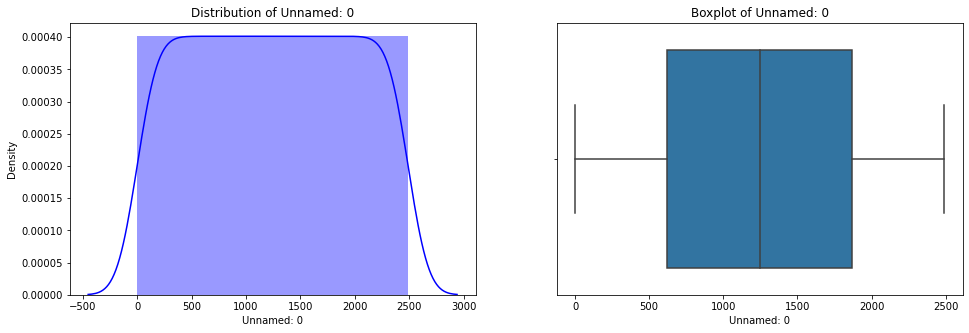

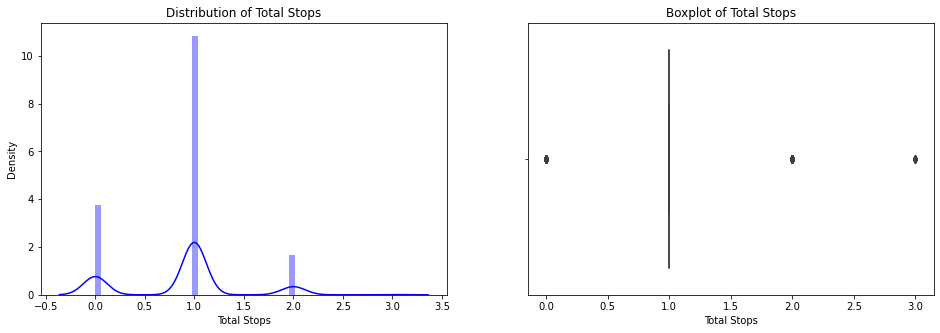

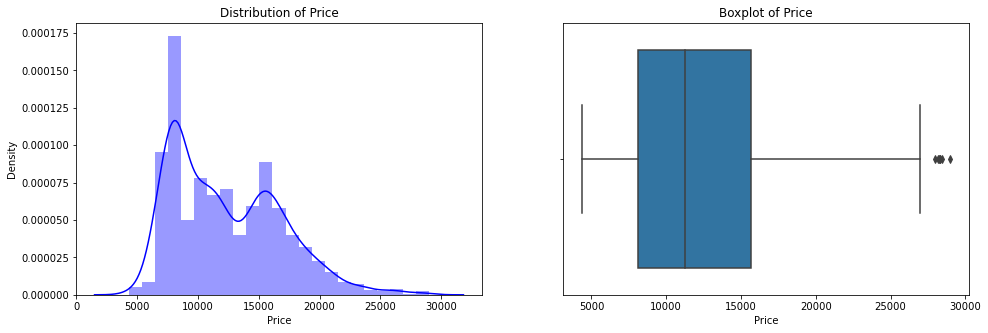

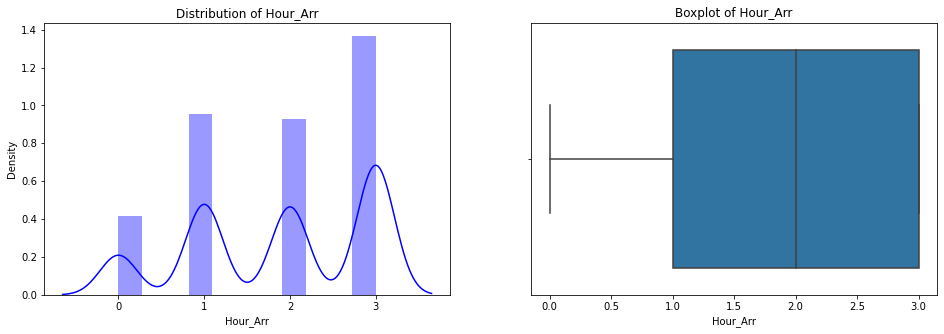

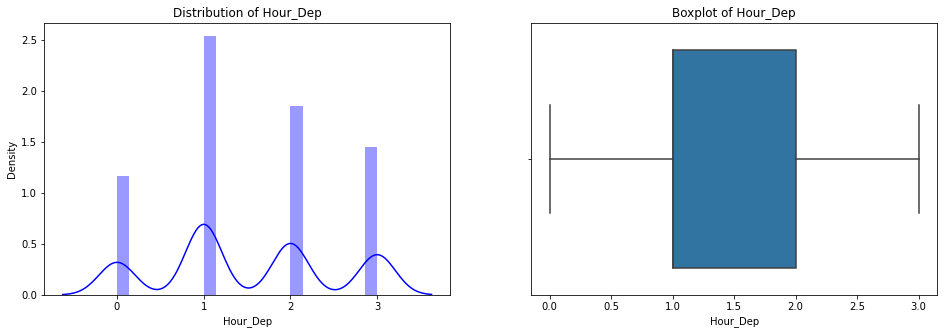

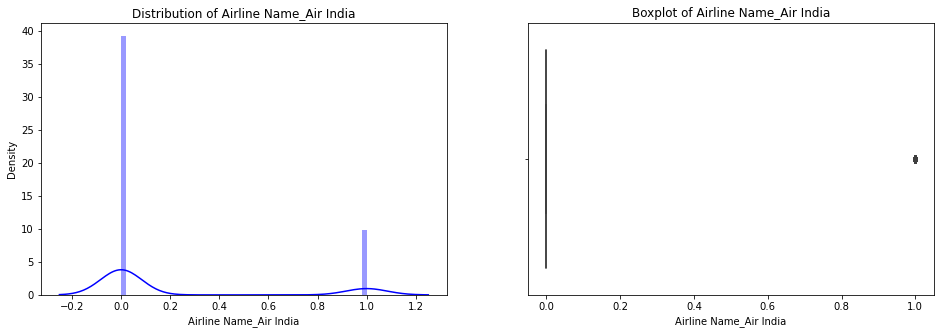

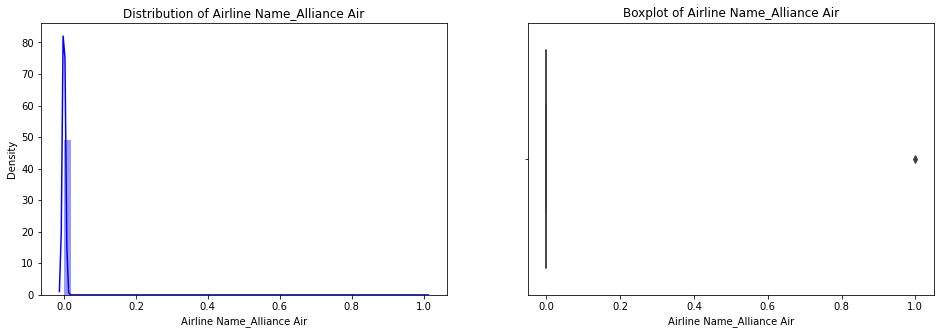

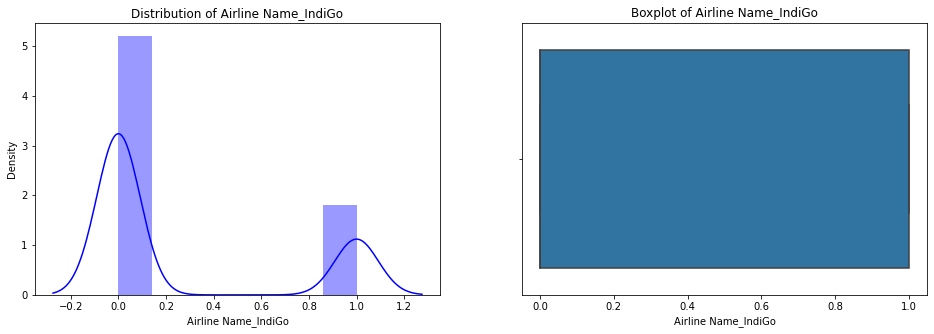

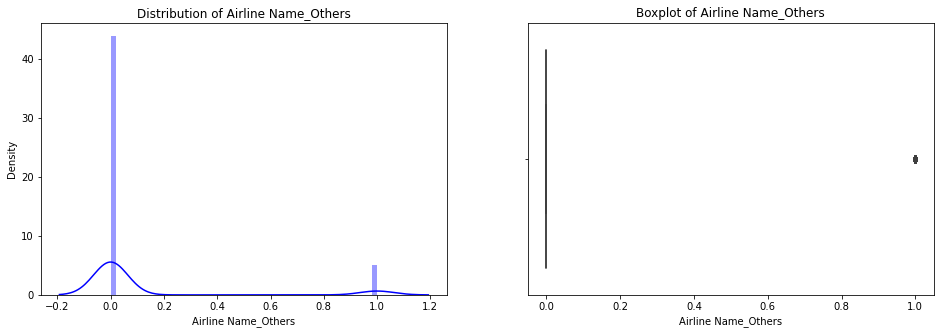

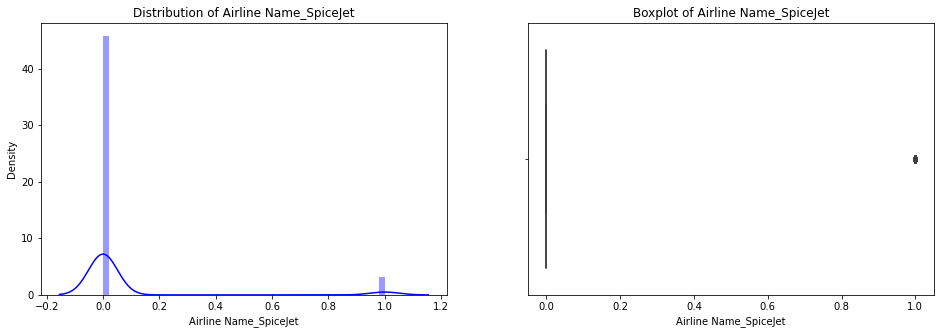

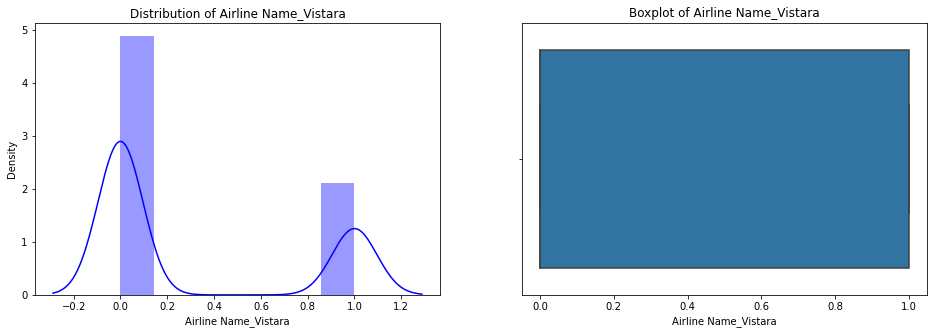

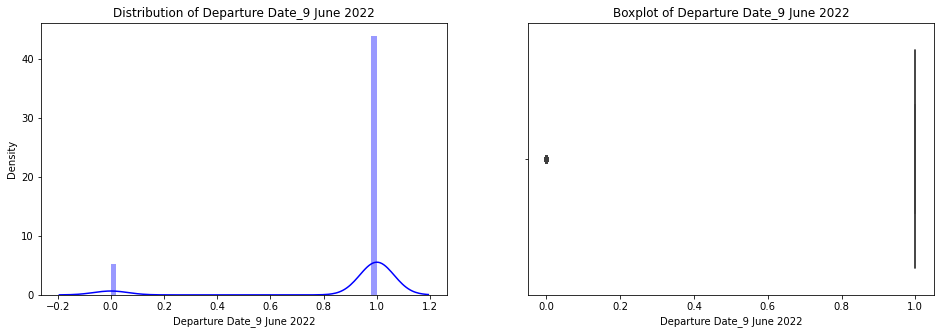

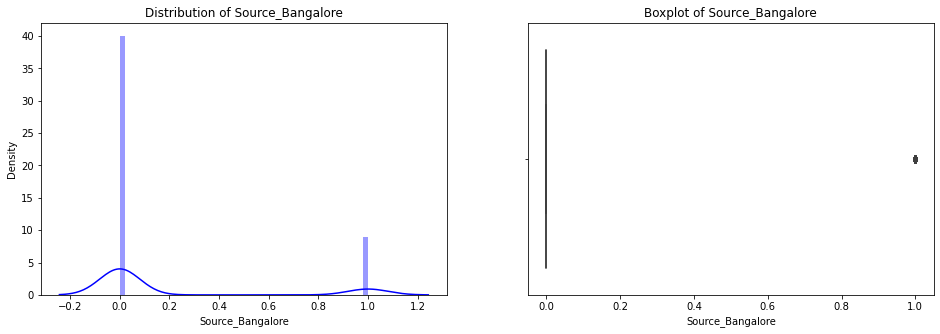

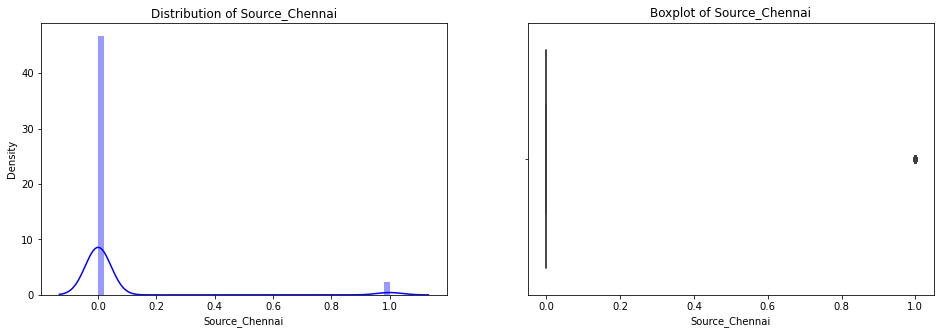

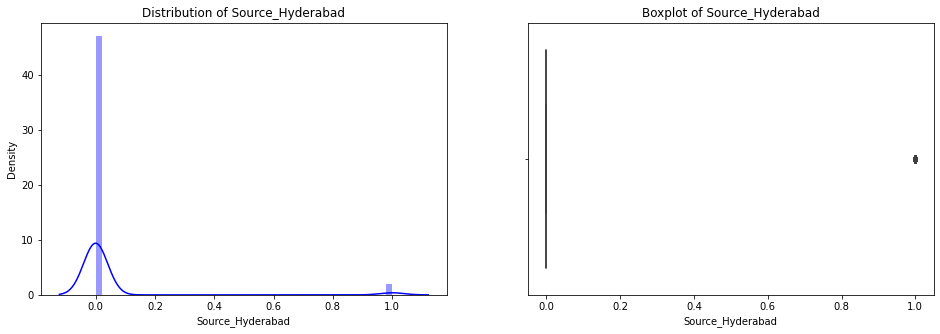

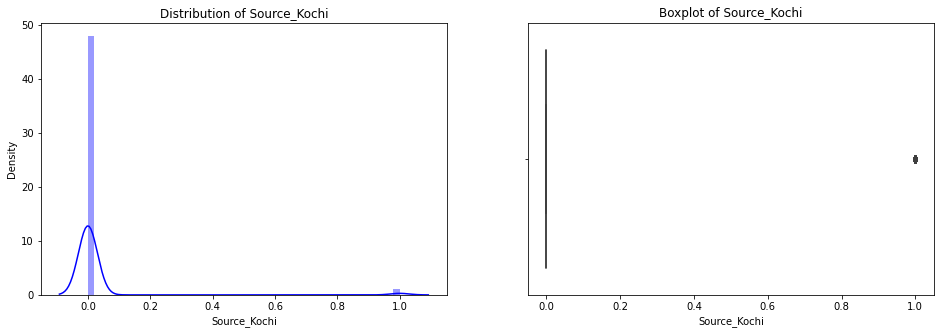

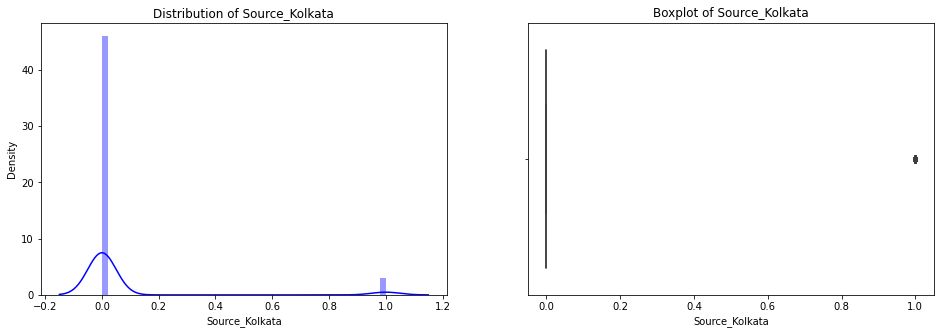

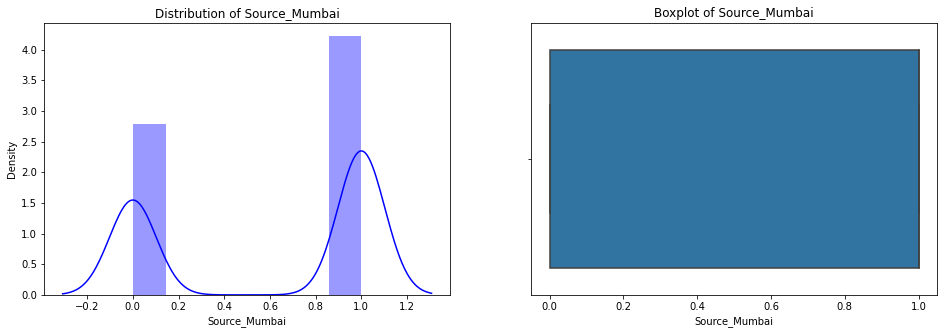

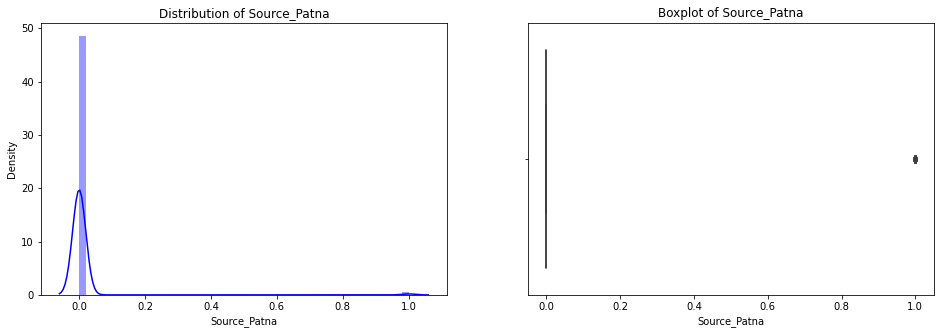

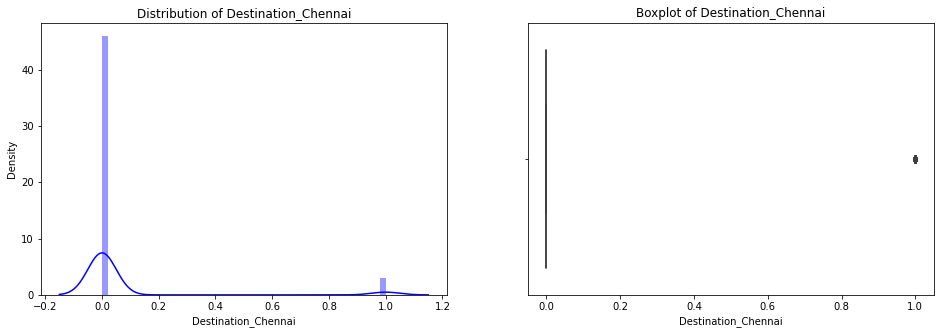

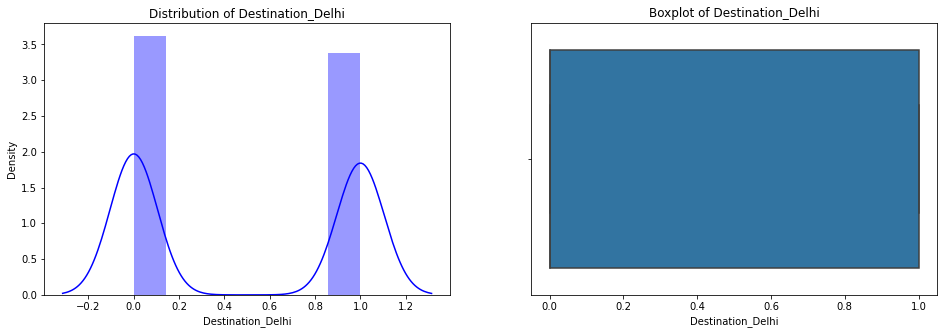

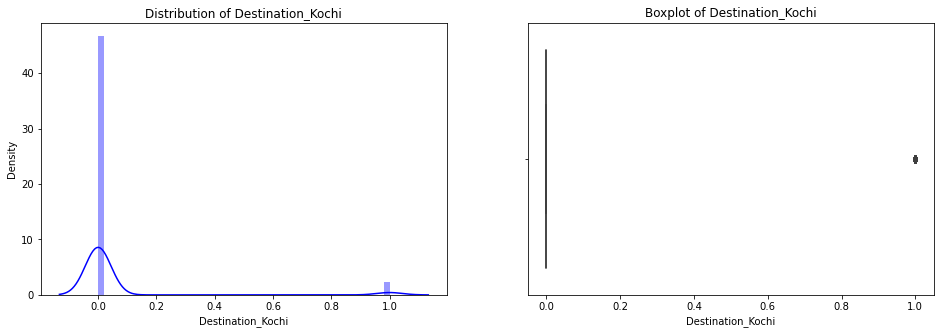

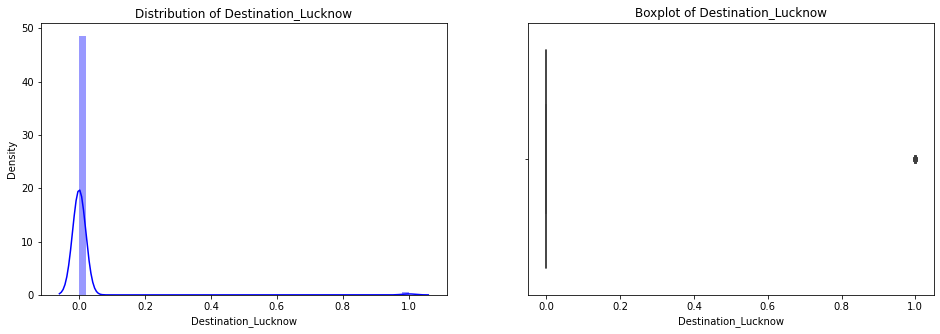

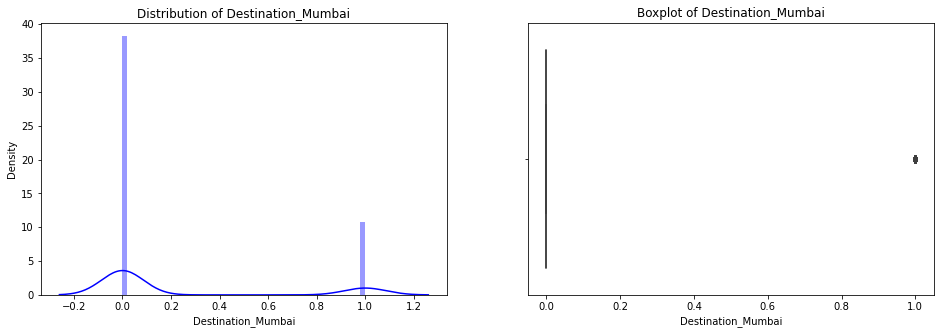

In [38]:
for i in df:    
    plt.figure(figsize=(16,5), facecolor='white')
    ax1 = plt.subplot(1,2,1)
    sns.distplot(df[i],color='Blue')
    plt.title('Distribution of {}'.format(i))
    
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.title('Boxplot of {}'.format(i))
    plt.show()

### There are some outliers in Price attribute let us remove them using z score method.

In [39]:
# zscore method

col = df[['Price']]
z_score = zscore(col)
abs_sco = np.abs(z_score)

fltr = (abs_sco<3).all(axis=1)
df = df[fltr]

#### Let us check the skewness and Correlation between the attributes in dataset

In [40]:
df.skew()

Unnamed: 0                     0.002387
Total Stops                    0.105652
Price                          0.561256
Hour_Arr                      -0.375589
Hour_Dep                       0.084927
Airline Name_Air India         1.502808
Airline Name_Alliance Air     49.729267
Airline Name_IndiGo            1.102130
Airline Name_Others            2.611758
Airline Name_SpiceJet          3.514330
Airline Name_Vistara           0.866896
Departure Date_9 June 2022    -2.590345
Source_Bangalore               1.628662
Source_Chennai                 4.309948
Source_Hyderabad               4.806199
Source_Kochi                   6.613269
Source_Kolkata                 3.668629
Source_Mumbai                 -0.424363
Source_Patna                  10.230253
Destination_Chennai            3.713468
Destination_Delhi              0.063961
Destination_Kochi              4.309948
Destination_Lucknow           10.230253
Destination_Mumbai             1.355693
dtype: float64

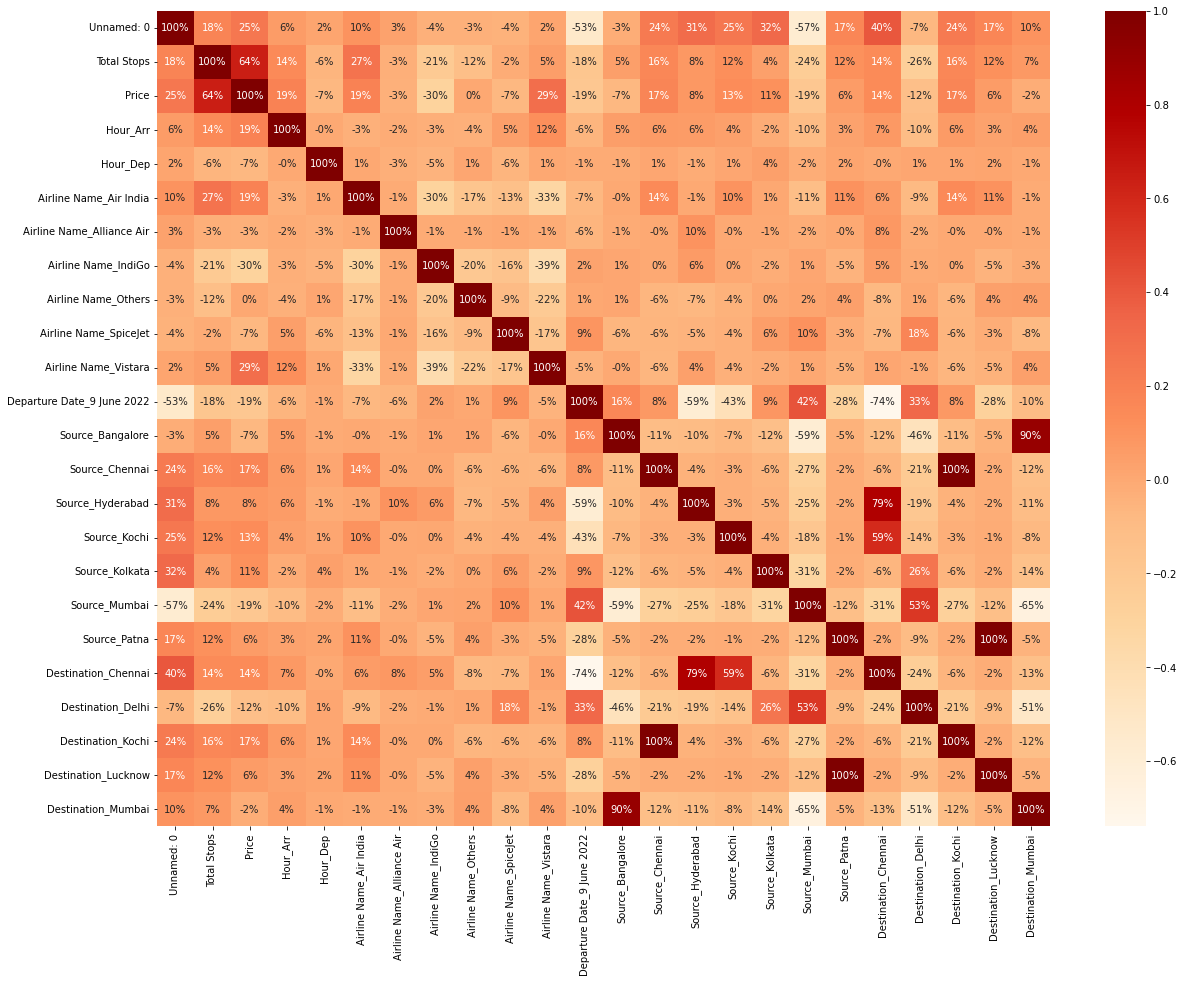

In [41]:
corr = df.corr()
plt.figure(figsize=(20,15), facecolor='white')
sns.heatmap(corr,fmt='.0%', annot=True, cmap='OrRd')
plt.show()

Price                     1.000000
Total Stops               0.643052
Airline Name_Vistara      0.294270
Unnamed: 0                0.250233
Hour_Arr                  0.186448
Airline Name_Air India    0.186358
Destination_Kochi         0.172488
Source_Chennai            0.172488
Destination_Chennai       0.143173
Source_Kochi              0.132556
Source_Kolkata            0.111855
Source_Hyderabad          0.076820
Destination_Lucknow       0.062013
Source_Patna              0.062013
Airline Name_Others       0.002459
Destination_Mumbai       -0.022687
dtype: float64


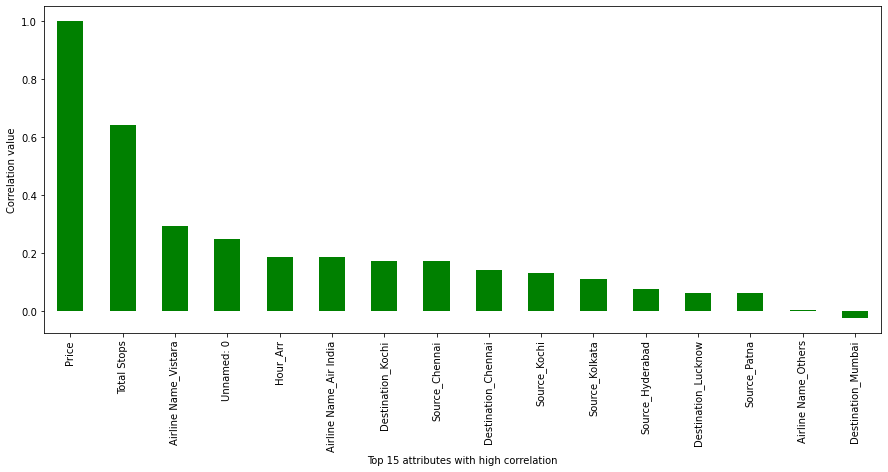

In [42]:
#checking correlation of attributes with Salesprice
corr_sale = df.corrwith(df['Price']).sort_values(ascending=False).head(16)
plt.figure(figsize=(15,6))
corr_sale.plot.bar(color='green')
plt.xlabel('Top 15 attributes with high correlation')
plt.ylabel('Correlation value')
plt.style.use('ggplot') 
print(corr_sale)
plt.show()

## Model Building

Let us proceed with model building by splitting the independent and target variables

In [43]:
#splitting the data
X = df.drop('Price', axis=1)
y = df['Price']

In [44]:
#Checking the importance of the attributes
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,Unnamed: 0,2.451782
1,Total Stops,1.275419
2,Hour_Arr,1.066390
3,Hour_Dep,1.025647
4,Airline Name_Air India,3.157036
5,Airline Name_Alliance Air,1.020214
6,Airline Name_IndiGo,3.574986
7,Airline Name_Others,2.266412
8,Airline Name_SpiceJet,1.879709
9,Airline Name_Vistara,3.815973


#### Based on VIF method we find that 'Source_Bangalore', 'Source_Kochi', 'Destination_Bangalore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Pune' have very high variance wrt other variables, let us proceed by dropping these attributes

In [46]:
X.drop(['Departure Date_9 June 2022','Destination_Mumbai'],inplace=True,axis=1)

In [47]:
#Checking the importance of the attributes

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,Unnamed: 0,6.898783
1,Total Stops,4.045795
2,Hour_Arr,4.496322
3,Hour_Dep,3.170518
4,Airline Name_Air India,3.418638
5,Airline Name_Alliance Air,1.017568
6,Airline Name_IndiGo,4.000259
7,Airline Name_Others,2.122930
8,Airline Name_SpiceJet,1.834763
9,Airline Name_Vistara,4.525642


### Standardization and splitting the dataset into train and test datasets

In [48]:
#standardizing the data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X) 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1854, 21), (619, 21), (1854,), (619,))

### Building different models and evaluating the models using different regression metrics
## 1. Linear Regression

*******************Results********************
The r2 score is: 0.6018174077951006
The mean absolute error 2105.8270400734705
The mean squared error 7372398.583639456
root mean square error 2715.2161209818005
The cross validation score 0.4406576627148519

*****************XXXXXXXXXXX********************


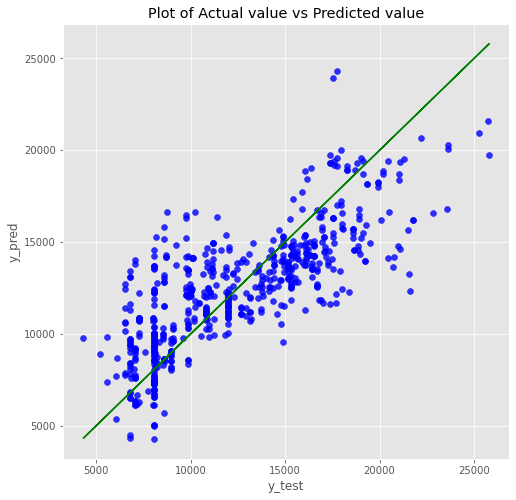

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##  Lasso

*******************Results********************
The r2 score is: 0.6020214889936812
The mean absolute error 2104.3644661165044
The mean squared error 7368619.995703123
root mean square error 2714.520214642566
The cross validation score 0.4465167106799563

*****************XXXXXXXXXXX********************


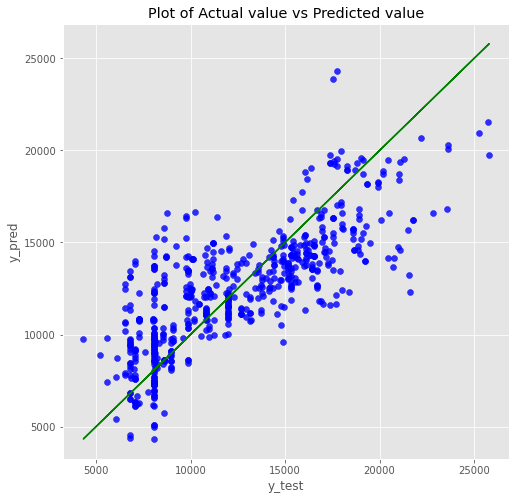

In [51]:
lass_lm = Lasso()
lass_lm.fit(X_train, y_train)
y_pred = lass_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lass_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. Random Forest

*******************Results********************
The r2 score is: 0.9152285657419693
The mean absolute error 620.5987399030695
The mean squared error 1569553.3006510502
root mean square error 1252.818143487334
The cross validation score 0.1751879784105317

*****************XXXXXXXXXXX********************


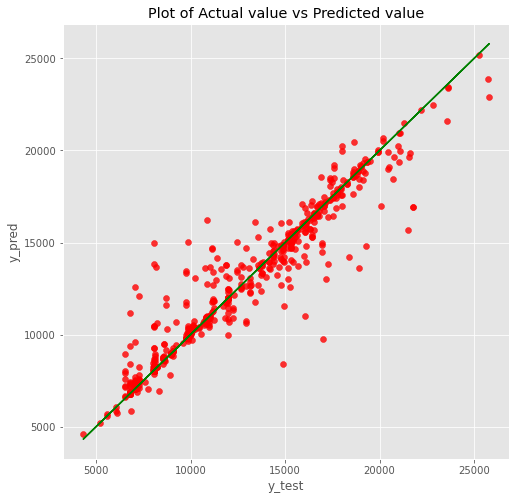

In [52]:
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. Gradient Boosting Regression

*******************Results********************
The r2 score is: 0.8074626360461423
The mean absolute error 1338.2404726244613
The mean squared error 3564852.4498546114
root mean square error 1888.081685164763
The cross validation score 0.10267835882638343

*****************XXXXXXXXXXX********************


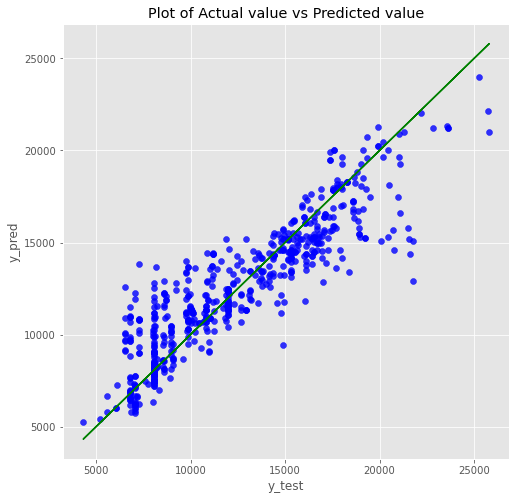

In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. XGBoost regression

*******************Results********************
The r2 score is: 0.9516808905534263
The mean absolute error 529.5978708097738
The mean squared error 894634.1226874369
root mean square error 945.8510044861383
The cross validation score 0.0971913980665069

*****************XXXXXXXXXXX********************


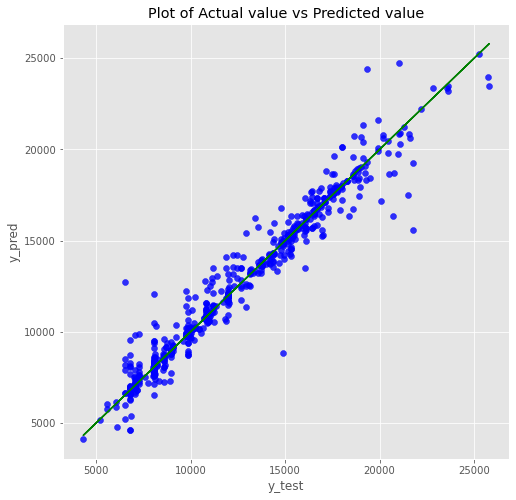

In [54]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 5. Deciscion Tree Regression

*******************Results********************
The r2 score is: 0.8491222935693841
The mean absolute error 571.43295638126
The mean squared error 2793518.8804523423
root mean square error 1671.3823262354854
The cross validation score -0.2518368556425753

*****************XXXXXXXXXXX********************


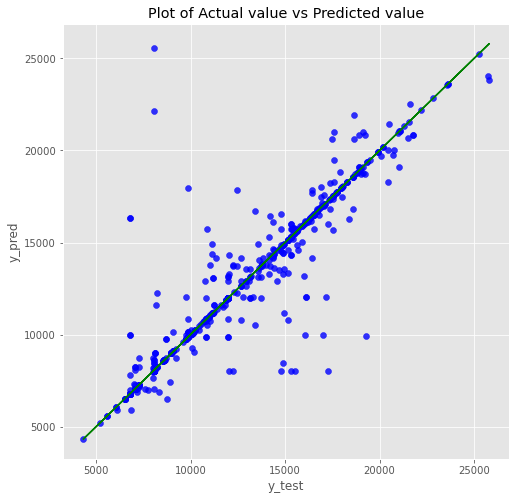

In [55]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

1. We can see too big values in MAE and MSE, that is due to individual parameters we got after the encoding of the Attributes.
2. As per the models we trained, we got several CV score, and graphs for the values predicted. 
3. Decision tree has least difference between CV score to R2score value. Hence choosing Gradient Boosting  to be BEST Model.

## Hyperparameter Optimization

Let us tune the parameters to improve th emodel performances using GridsearchCV.

In [56]:
random_forest_grid = RandomForestRegressor()

params = {'max_depth':[1,5,8,12],
           'min_samples_split':[2,4,7,12,16],
           'min_samples_leaf':[1,5,8,3,12],
           'max_features':['auto','sqrt']
         }
          
grid_CV = GridSearchCV(estimator=random_forest_grid, param_grid=params)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

*******************Results********************
The r2 score is: 0.8261724374925115
The mean absolute error 1078.2219779277898
The mean squared error 3218438.2258686265
root mean square error 1794.0006203646158
The cross validation score 0.39146393936317725

*****************XXXXXXXXXXX********************


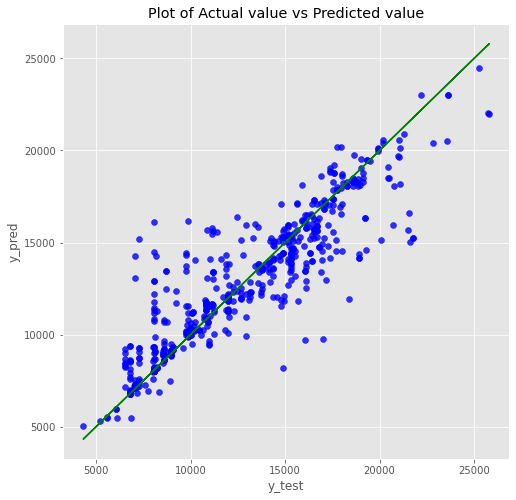

In [57]:
random_forest_grid = RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=3, min_samples_split=12)
random_forest_grid.fit(X_train, y_train)
y_pred = random_forest_grid.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(random_forest_grid, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Saving the best model

Let us save the best model 

In [58]:
import pickle

file = open('Flight Price Prediction.pkl', 'wb')

pickle.dump('random_forest_grid',file)